In [26]:
import pandas as pd
from json import loads, dumps


In [27]:

df= pd.read_csv("lfsi_emp_a_h.csv")
df

,age,unit,sex,indic_em,geo,year,employment
0,Y15-24,PC_POP,F,ACT,AT,2020,52.8
1,Y15-24,PC_POP,F,ACT,BE,2020,26.5
2,Y15-24,PC_POP,F,ACT,BG,2020,18.2
3,Y15-24,PC_POP,F,ACT,CH,2020,64.6
4,Y15-24,PC_POP,F,ACT,CY,2020,36.6
...,...,...,...,...,...,...,...
69943,Y55-64,THS_PER,T,EMP_LFS,SE,1992,:
69944,Y55-64,THS_PER,T,EMP_LFS,SI,1992,:
69945,Y55-64,THS_PER,T,EMP_LFS,SK,1992,:
69946,Y55-64,THS_PER,T,EMP_LFS,TR,1992,:


In [28]:
# To get the unique values in column 'A', you would do:
unique_values_in_df = df['employment'].unique()
print(unique_values_in_df)

['52.8 ' '26.5 ' '18.2 ' ... '1052 e' '1855 e' '1730 e']


In [29]:
# Create a mask where True indicates the string looks like a float
df['employment'] = df['employment'].str.replace('b', '', regex=False)
df['employment'] = df['employment'].str.replace('p', '', regex=False)
df['employment'] = df['employment'].str.replace('e', '', regex=False)


df['employment'] = df['employment'].str.strip()
mask = df['employment'].str.contains('^\d+(\.\d+)?$', na=False)

# df_floats = df[mask]
# df_floats
# Extract the float-like part from the 'employment' column



C:\Users\Jefta\AppData\Local\Temp\ipykernel_11836\2560549244.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df['employment'].str.contains('^\d+(\.\d+)?$', na=False)


In [30]:
for i,row in df.iterrows():
    if mask[i]:
        pass
    elif ":" in row["employment"]:
        pass
    else:
        print (row["employment"])

In [31]:
import matplotlib.pyplot as plt

In [32]:
df_filtered = df[
    (df['age'] == 'Y15-24') &  # replace 'your_age_group' with the actual age group
    (df['unit'] == 'PC_POP') &
    (df['sex'] == 'F') &
    (df['indic_em'] == 'ACT') &
    (df['geo'] == 'DK') &
    (df['employment'] != ':')
]




In [33]:
type(df_filtered["year"].iloc[2])

numpy.int64

In [34]:

# Convert 'year' column to datetime and 'employment' to numeric values if they are not already
df_filtered['year'] = pd.to_datetime(df_filtered['year'], format='%Y')
# df_filtered['employment'] = pd.to_numeric(df_filtered['employment'])

# Sort by year





C:\Users\Jefta\AppData\Local\Temp\ipykernel_11836\4218598932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = pd.to_datetime(df_filtered['year'], format='%Y')


In [35]:
# mask2 = df['employment'].str.contains('^\d+(\.\d+)?$', na=False)

for i,row in df_filtered.iterrows():
    # if mask2[i]:
        # pass
    # elif ":" in row["employment"]:
        # pass
    # else:
    print (row["employment"])
        

60.4
61.8
60.8
61.2
61.2
58.9
58.8
59.0
60.9
63.3
63.9
67.2
68.2
69.1
69.3
66.2
66.0
63.5
66.4
65.8
67.8
69.7
70.9
70.5
70.4
69.4
67.5
69.4


In [36]:
df_filtered['employment'] = pd.to_numeric(df_filtered['employment'], errors='coerce')


C:\Users\Jefta\AppData\Local\Temp\ipykernel_11836\955129068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['employment'] = pd.to_numeric(df_filtered['employment'], errors='coerce')


In [ ]:
df_filtered.to_csv('df_filtered.csv', index=False)


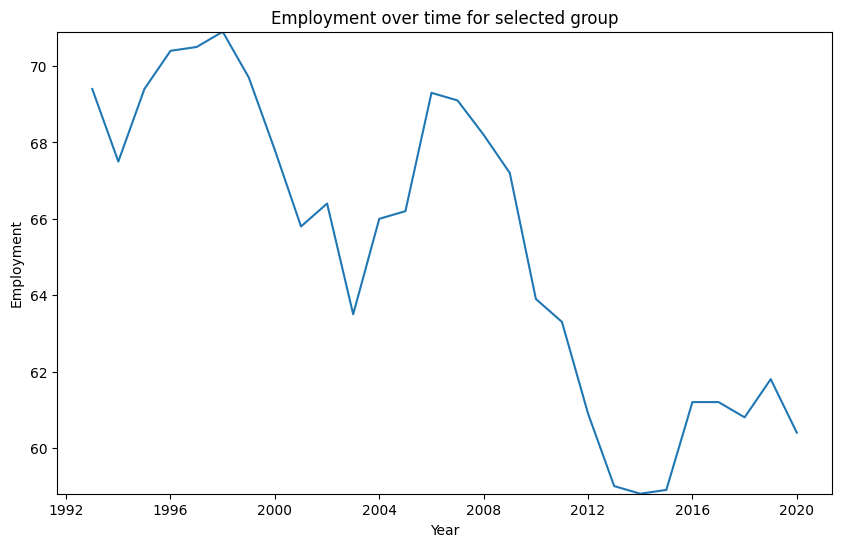

In [38]:
df_filtered = df_filtered.sort_values('year')


# Calculate the minimum and maximum employment values
min_value = df_filtered['employment'].min()
max_value = df_filtered['employment'].max()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['year'], df_filtered['employment'])

# Set the y-axis limits
plt.ylim([min_value, max_value])

# Set the title and labels
plt.title('Employment over time for selected group')
plt.xlabel('Year')
plt.ylabel('Employment')

# Show the plot
plt.show()
